# Project: Used Cars Dataset
## Table of Contents
<ul>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">EDA</a></li>
<li><a href="#top manufacturer">Which manufacturer does Craigslist have the most?</a></li>
<li><a href="#highestCoun">What is the most Transmission , Condtion , Car type are for sale?</a></li>
<li><a href="#OverTime">Which region has the most number of cars? </a></li>
<li><a href="#directors">Which color does the Craigslist Cars have?</a></li>
<li><a href="#avgduration">What is the top Manufacturer,Region by Price is  ?</a></li>
<li><a href="#distRating">What are the top 20 regions with valuable cars?</a></li>
</ul>

In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from matplotlib.ticker import FuncFormatter

In [3]:
df = pd.read_csv("C:/Users/ymeny/Desktop/Mid project/vehicles.csv")
df.tail(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426870,7301592119,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,...,NaN,sedan,blue,https://images.craigslist.org/00u0u_eRGgkSql5l...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:40:17-0600
426871,7301591639,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,...,NaN,SUV,NaN,https://images.craigslist.org/00U0U_4VvCQuqnfb...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:30:20-0600
426872,7301591201,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,...,NaN,sedan,white,https://images.craigslist.org/00808_bYj0inoZ58...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:35-0600
426873,7301591202,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,...,NaN,other,white,https://images.craigslist.org/00Q0Q_9VUbj91fKb...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:35-0600
426874,7301591199,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,...,NaN,sedan,white,https://images.craigslist.org/00I0I_hJHfjCUppa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:34-0600
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


<a id='cleaning'></a>
### data  cleaning

In [4]:
df.shape

(426880, 26)

In [5]:
# check null values
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [6]:
# check what every column have 
for column in df.columns:
    unique_vals = df[column].unique()
    if len(unique_vals) < 20:
        print(f"Column: {column}")
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
    else:
        print(f"Column: {column} has more than 20 unique values\n")

Column: id has more than 20 unique values

Column: url has more than 20 unique values

Column: region has more than 20 unique values

Column: region_url has more than 20 unique values

Column: price has more than 20 unique values

Column: year has more than 20 unique values

Column: manufacturer has more than 20 unique values

Column: model has more than 20 unique values

Column: condition
Unique Values (7): [nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']

Column: cylinders
Unique Values (9): [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']

Column: fuel
Unique Values (6): [nan 'gas' 'other' 'diesel' 'hybrid' 'electric']

Column: odometer has more than 20 unique values

Column: title_status
Unique Values (7): [nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']

Column: transmission
Unique Values (4): [nan 'other' 'automatic' 'manual']

Column: VIN has more than 20 unique values

Column: drive
Uniqu

In [7]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [8]:
# check duplicated record
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [10]:
#Dealling with missing values rows 
df= df.dropna(subset=['year', 'manufacturer','posting_date'],how='any')

In [11]:
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)

In [12]:
# change year and posting_date column format
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['year']=df['year'].astype(int)
df.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04 09:21:31+00:00
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04 09:21:29+00:00
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04 09:21:17+00:00
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04 09:21:11+00:00
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04 09:21:07+00:00


In [13]:
df.shape

(409228, 26)

<a id='eda'></a>
# EDA

<a id="top manufacturer"></a>
### Which manufacturer does Craigslist have the most ? 

In [57]:
df['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2107
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


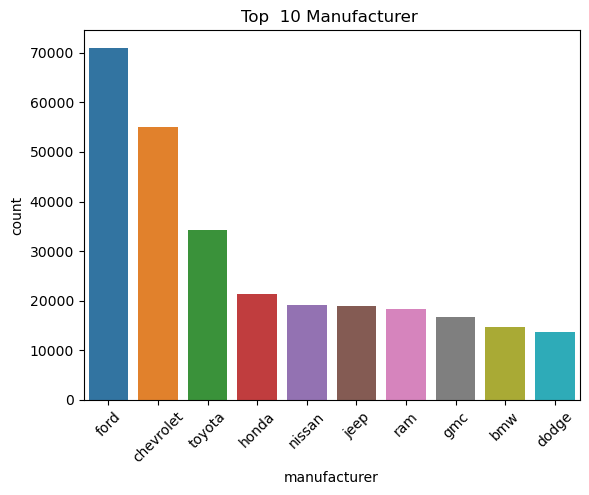

In [15]:
sns.countplot(x = df['manufacturer'], order=df['manufacturer'].value_counts().index[:10])
plt.title('Top  10 Manufacturer ') 
plt.xticks(rotation=45)
plt.show()

<a id="highestCoun"></a>
### What is the most Transmission , Condtion , Car type are for sale?

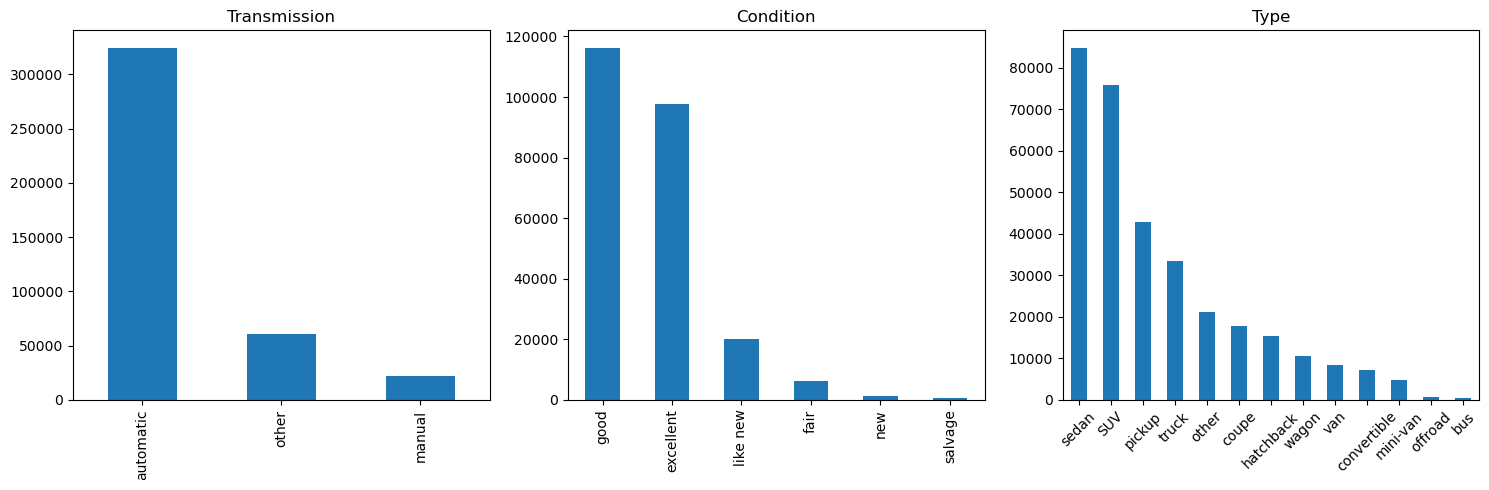

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for transmission
df['transmission'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Transmission')

# Plot for condition
df['condition'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Condition')

# Plot for type
df['type'].value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Type')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id='OverTime'></a>
### Which region has the most number of cars? 

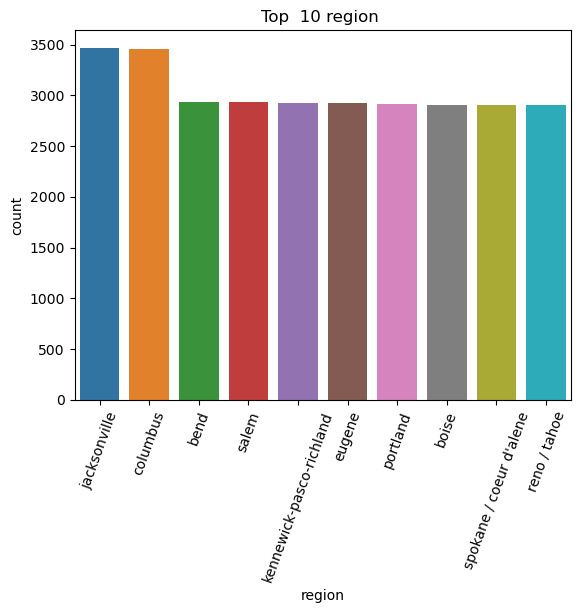

In [20]:
sns.countplot(x = df['region'], order=df['region'].value_counts().index[:10])
plt.title('Top  10 region ') 
plt.xticks(rotation=70)
plt.show()

<a id='directors'></a>
### Which color does the Craigslist Cars have?

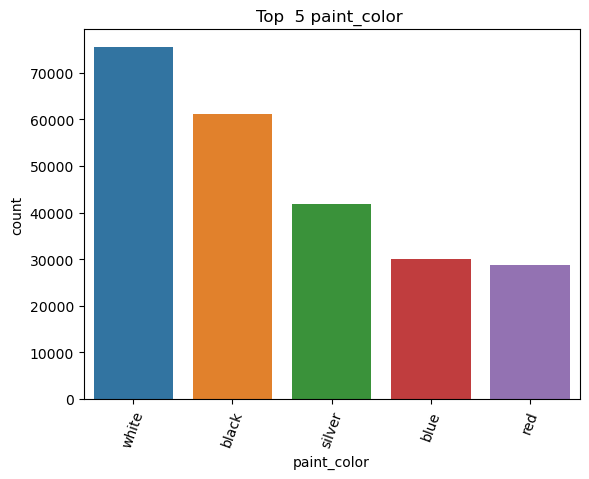

In [59]:
sns.countplot(x = df['paint_color'], order=df['paint_color'].value_counts().index[:5])
plt.title('Top  5 paint_color ') 
plt.xticks(rotation=70)
plt.show()

<a id='avgduration'></a>
### What is the top Manufacturer,Region by Price is  ?

In [31]:
# Group by 'manufacturer' and 'region' and calculate the sum of 'price' for the entire dataset
grouped_df = df.groupby(['manufacturer', 'region'])['price'].sum().reset_index()

# Sort the grouped DataFrame by 'price' in descending order and select the top 10 prices
grouped_df.sort_values(by='price', ascending=False).head(10)

,manufacturer,region,price
11586,toyota,eugene,3742469445
11657,toyota,knoxville,3741499996
8092,mercedes-benz,south jersey,3026301706
7864,mercedes-benz,delaware,3025152111
2360,chevrolet,modesto,3016696286
6039,jeep,frederick,1410451567
12389,volvo,indianapolis,1234876066
3743,ford,humboldt county,1112400210
6139,jeep,modesto,1112163889
2156,chevrolet,atlanta,992870696


<a id='distRating'></a>
### What are the top 20 regions with valuable cars?

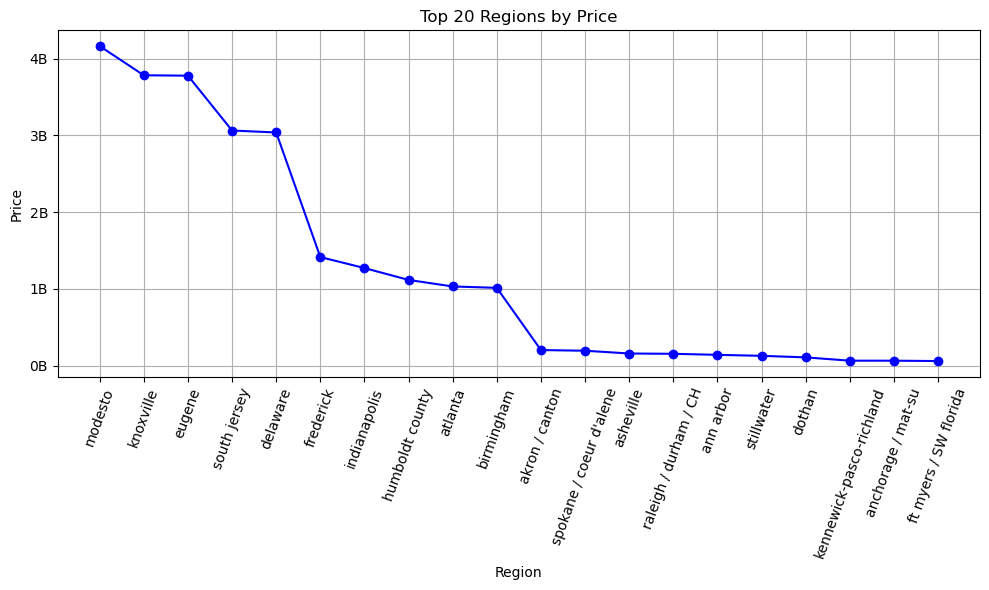

In [48]:
gro = df.groupby(['region'])['price'].sum().reset_index()

# Sort values by 'price' in descending order and select the top 20
top_20 = gro.sort_values(by='price', ascending=False).head(20)

# Function to format the y-axis labels in billions
def billions(x, pos):
    return '%1.0fB' % (x * 1e-9)

# Create the formatter
formatter = FuncFormatter(billions)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(top_20['region'], top_20['price'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=70)  # Rotate region names for better readability
plt.gca().yaxis.set_major_formatter(formatter)  # Set the y-axis formatter
plt.xlabel('Region')
plt.ylabel('Price')
plt.title('Top 20 Regions by Price')
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for x-axis labels


plt.show()